In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. What is probability

Life is full of uncertainties. We don’t know the outcomes of a particular situation until it happens. Will it rain today? Will I pass the next math test? Will my favorite team win the toss? Will I get a promotion in next 6 months? All these questions are examples of uncertain situations we live in. Let us map them to few common terminology which we will use going forward:
  - **Experiment** – are the uncertain situations, which could have multiple outcomes. Whether it rains on a daily basis is an experiment.
  - **Outcome** is the result of a single trial. So, if it rains today, the outcome of today’s trial from the experiment is “It rained”
  - **Event** is one or more outcome from an experiment. “It rained” is one of the possible event for this experiment.
  - **Probability** is a measure of how likely an event is. So, if it is 60% chance that it will rain tomorrow, the probability of Outcome “it rained” for tomorrow is 0.6
  - **Random variable** is a variable defined in terms of the outcome of a process. Let’s say X = outcome of a coin toss.

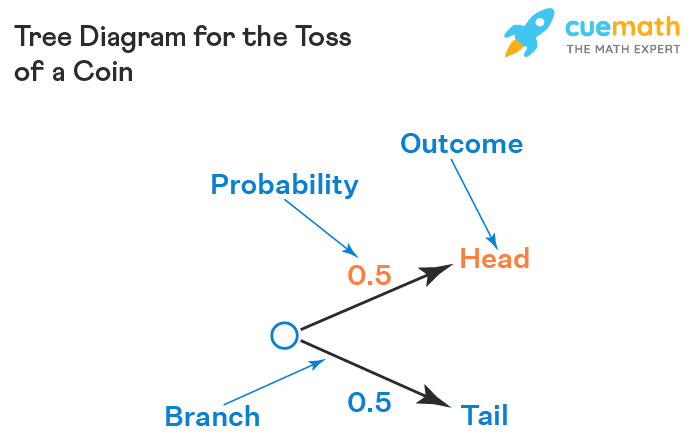

# 2. Dependency of events

- **Independent events:**
  - ***Simple event*** - an event that has a single point of the sample space is known as a simple event in probability.
  - ***Compound event*** - if an event has more than one sample point, it is termed a compound event. This event involve the probability of more than one event occurring together.
- **Mutually exclusive events** - Two events A and B are said to be mutually exclusive events if they cannot occur at the same time.

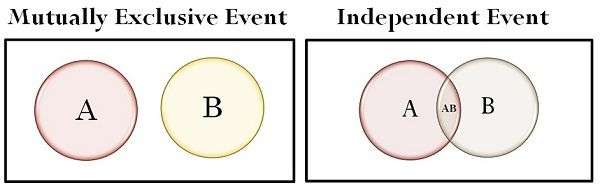

- **Dependent events** - are those events that are affected by the outcomes of events that had already occurred previously. i.e. Two or more events that depend on one another are known as dependent events. If one event is by chance changed, then another is likely to differ.

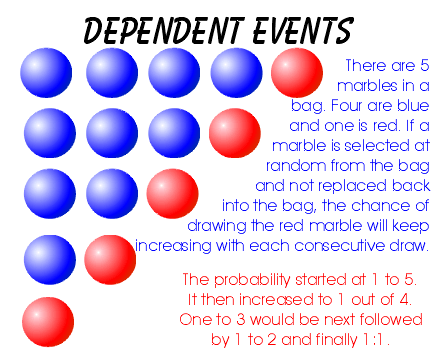

# 3. Probability distribution

## 3.1 Two throws of a dice

Let's imagine we play the game with dice where we win if we get a **sum of 8 in two throws**. Let’s see if we have more chances to win here.

Let’s take random variable X to be the sum of two throws of a dice. X can take values (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12). Let’s see the probability of each number. \
There are 6 possibilities in the first throw (we can get any number) and same 6 in the second. So total number of combinations would be 36.

Let’s see how:

**2**{(1,1)}  => 1/36

**3**{(1,2),(2,1)} => 2/36

**4**{(2,2),(3,1),(1,3)} => 3/36

**5**{(1,4),(4,1),(2,3),(3,2)} => 4/36

**6**{(3,3),(1,5),(5,1),(2,4),(4,2)} => 5/36

**7**{(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)} => 6/36

**8**{(2,6),(6,2),(3,5),(5,3),(4,4)} => ***5/36***

**9**{(3,6),(6,3),(5,4),(4,5)} => 4/36

**10**{(4,6),(6,4),(5,5)} => 3/36

**11**{(5,6),(6,5)} => 2/36

**12**{(6,6)} = > 1/36

So, the chance of success here is **5/36** or approximately 1 in 7, while failure is 31/36. So, unless the stall rewards us 7x of the money we bet on winning, it is a bad game to participate in.

We can write this as:
  - p (Success)= 5/36
  - p (Failure)= 31/36
  ___

Now let's create a sample of this probability distribution with 20 outcomes using numpy.random.choice

In [2]:
np.random.choice([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 p=[1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36], size=20)

array([ 4,  9,  7,  9,  7, 10,  6,  8, 10,  6,  4,  5, 12, 10,  8,  5,  9,
        7,  5,  3])

___
And finally let's look at it on the graph:

<AxesSubplot: xlabel='Sum of two throws', ylabel='Probability'>

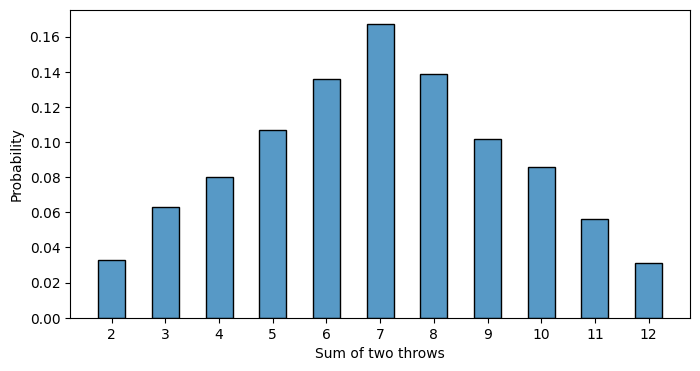

In [23]:
x = np.random.choice([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 p=[1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36], size=1000)

plt.figure(figsize=(8,4))
plt.xticks(np.arange(2, 13))
plt.xlabel('Sum of two throws')
sns.histplot(x, discrete=True, shrink=0.5, stat='probability')

## 3.2 Binomial Distribution

Most of the times, the situations we encounter are pass-fail type. The democrats either *win* or *lose* the election. You either get a *heads* or *tails* on the coin toss. Football team either *win* or *lose* your a game (assuming that there is always a forced outcome). So there are only two outcomes – win and lose or success and failure. \
***The likelihood of the two may or may not be the same.***

Let us understand this through an interesting example.

Let’s say your football team is playing a series of 5 games against your opponent. Who ever wins more games (out of 5) wins the title.

Let us say, your team might is more skilled and has 75% chances of winning. So, there is a 25% chance of losing it. \
Assuming that the first game has no effect on the outcome of the second – No one gets tired, no one gets under pressure after losing etc.

**What is the probability of you winning the series? Is it 75% or is it something else?**

Let us find out. What are the possible scenarios in playing 5 games? \
WWWWW, WWWWL, WWWLL, WWLLL, WLLLL, LLLLL, LWWWW and so on…

So let’s define our random variable X to be a number of wins in 5 games. \
**X=Number of wins in 5 games**

So the first game has 2 outcomes – win and lose, second again has 2 and so on. \
**So total possibilities is 2\*2\*2\*2\*2 = 32**

Let's make this experiment using **numpy.random.binomial** where: 
  - **n** - number of trials (e.g. 5 games in a series)
  - **p** - probability of occurence of each trial (e.g. 0.75 for win a game))
  - **size** - the shape of the returned array
  
Please start with **100 size** then gradually increase it up to **100000 size** and check how the probability distribution will change.

<AxesSubplot: xlabel='X=Number of wins in 5 games', ylabel='Probability'>

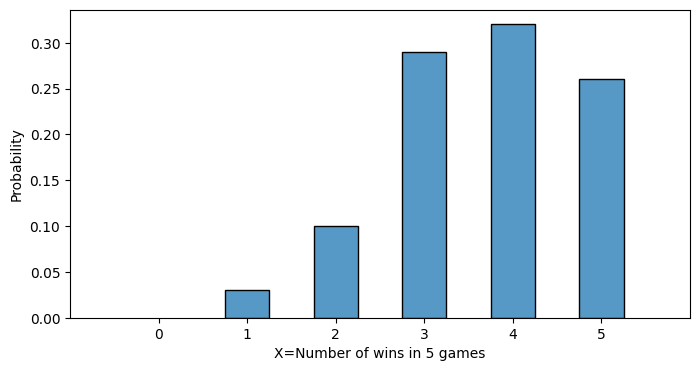

In [79]:
x = np.random.binomial(n=5, p=0.75, size=100)

plt.figure(figsize=(8,4))
plt.xticks(np.array([0, 1, 2, 3, 4, 5]))
plt.xlim(-1, 6)
plt.xlabel('X=Number of wins in 5 games')
sns.histplot(x, discrete=True, shrink=0.5, stat='probability')

As you can see the probability of winning the series is much higher than 0.75!

If the events are equally likely to occur i.e. **p = 0.5**, the probability distribution looks something like the graph below. Here the probability of success and failure is the same.

This graph represents the probability distribution of 5 tosses of a fair coin:

<AxesSubplot: xlabel='Number of Heads', ylabel='Probability'>

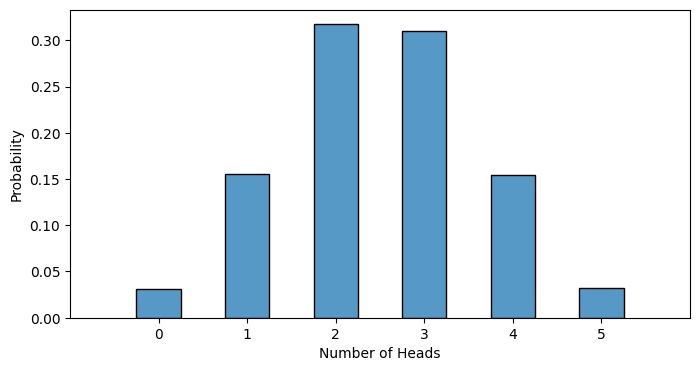

In [5]:
x = np.random.binomial(n=5, p=0.5, size=10000)

plt.figure(figsize=(8,4))
plt.xticks(np.array([0, 1, 2, 3, 4, 5]))
plt.xlim(-1, 6)
plt.xlabel('Number of Heads')
sns.histplot(x, discrete=True, shrink=0.5, stat='probability')

What difference do we see in the two probability distributions?  The first one is *skewed towards right*. Reason being the likelihood to win is more, hence more wins are more likely than more losses.

In the second case when wins and losses are equally likely, so the distribution is *symmetrical*.

Using binomial distribution we can model many life examples.

Let's imagine there are twenty multiple choice questions in an entrance examination. Each question has four options, and only one of them is correct. Find the probability of having **eight or more than eight** correct answers if a student attempts to answer every question at random:

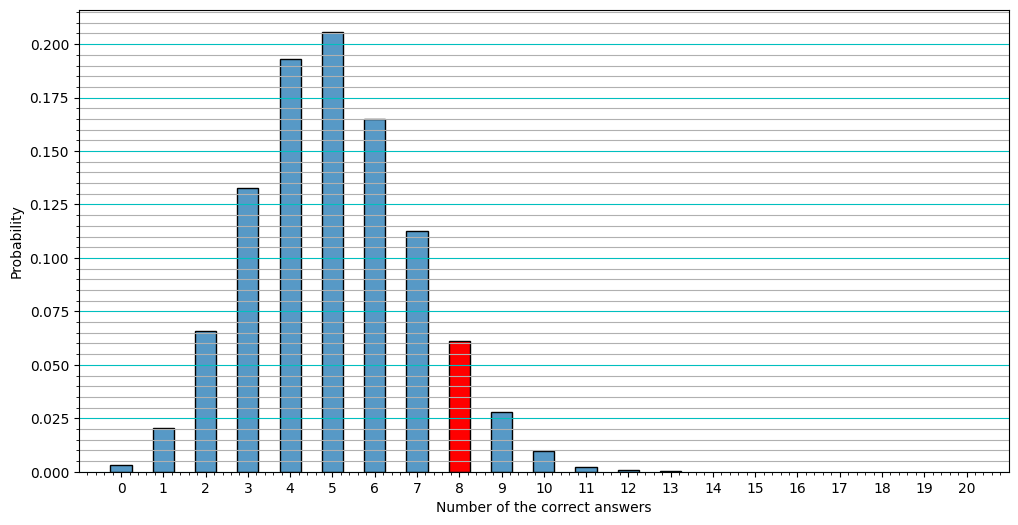

In [80]:
x = np.random.binomial(n=20, p=0.25, size=10000)

plt.figure(figsize=(12,6))
plt.xticks(np.arange(21))
plt.xlim(-1, 21)
plt.xlabel('Number of the correct answers')
ax = sns.histplot(x, discrete=True, shrink=0.5, stat='probability')
ax.patches[8].set_facecolor('red')
ax.minorticks_on()
ax.grid(axis='y', c='c')
ax.grid(which='minor', axis='y')

This histogram shows us that preparing for the exam is the much more successful way than lay on random picks :)
___

## 3.3 Normal distribution

The Normal Distribution is one of the most important distributions. \
It is also called as a *bell curve* or the *Gaussian Distribution* after the German mathematician Carl Friedrich Gauss.

It fits the probability distribution of many events, eg. IQ Scores, Heartbeat, Heights of people, Errors in measurements etc.

The Normal Distribution has:
  - mean = median = mode
  - symmetry about the center
  - 50% of values less than the mean
  - and 50% greater than the mean

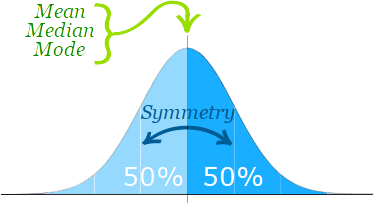

Here **µ** is the **mean** of the data while **σ** is the **standard deviation** of the data.

The normal distribution is perfectly symmetrical about the mean. The probabilities move similarly in both directions around the mean. The total area under the curve is 1, since summing up all the possible probabilities would give 1.

When we calculate the standard deviation we find that generally:
  - *~68%* of values are within 1 standard deviation of the mean
  - *~95%* of values are within 2 standard deviations of the mean
  - *~99,7% of values are within 3 standard deviations of the mean

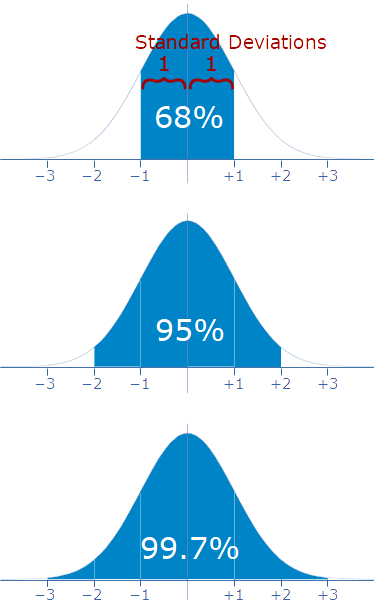

Now let's use **numpy.random.normal** to create a graph with normal distribution where:
  - **loc** - Mean (µ) where the peak of the bell exists (0 in our case).
  - **scale** - Standard Deviation (σ) how flat the graph distribution should be (1 in our case).
  - **size** - The shape of the returned array.

<AxesSubplot: xlabel='Standard Deviation', ylabel='Density'>

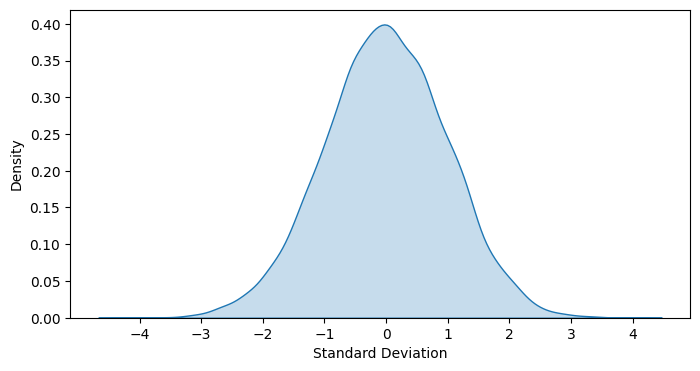

In [7]:
x = np.random.normal(loc=0, scale=1, size=10000)

plt.figure(figsize=(8, 4))
plt.xticks(np.arange(-4, 5))
plt.xlabel('Standard Deviation')
sns.kdeplot(x, fill=True)

The distribution might vary a bit depending upon how spread the data is. If the data has a very high range and standard deviation, the normally distributed curve would be spread out and flatter, since a large number of values would be sufficiently away from the mean.

Also, if a lot of values are away from the mean, the probability for data being around the mean also drops. Similarly, if the standard deviation is low, which means most of the values are near around the mean, there is high probability of the sample mean being around the mean and the distribution is a lot skinnier. **The higher the standard deviation, the thicker and flatter the curve.**

Let's add to our graph two more kde plots with **σ=2** and **σ=4**:

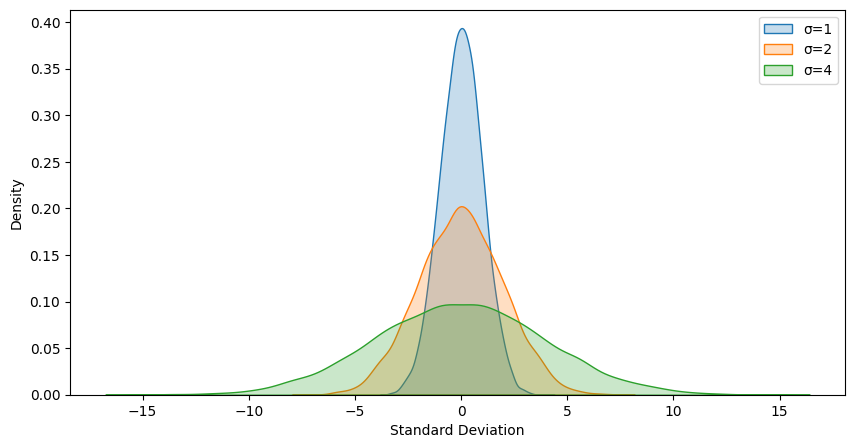

In [8]:
x1 = np.random.normal(loc=0, scale=1, size=10000)
x2 = np.random.normal(loc=0, scale=2, size=10000)
x3 = np.random.normal(loc=0, scale=4, size=10000)

plt.figure(figsize=(10, 5))
plt.xlabel('Standard Deviation')
sns.kdeplot(x1, fill=True)
sns.kdeplot(x2, fill=True)
sns.kdeplot(x3, fill=True)
plt.legend(['σ=1', 'σ=2', 'σ=4'])

# 4. Combinatorics

## 4.1 Permutations

Permutations are the number of ways a subset of a specified size can be arranged from a given set, generally **without replacement**. An example of this would be a 4 digit PIN with no repeated digits. The probability of having no repeated digits can be calculated by executing the following calculation:

*10\*9\*8\*7*

You have 10 numbers to choose from, but as you're working without replacement, one option always falls away as you pick a number for the 4-digit pin. This means that in picking the first number for your pin, you'll have 10 numbers to choose from (0 to 9), but for the second number of your pin, you'll only have 9 options to choose from, etc.

To deeply understand this example we can devide it into two parts:
  - *the numbers to choose from (10)*
  - *the numbers that you actually choose (4)*
  
When calculating the permutations, we just need to calculate the full set of the numbers to choose from (10) and divide the result by the difference in the numbers to choose from (10) and the numbers that you actually choose (4). 

*Note that you can also write the above as:*

**10P4 = 10!/(10 - 4)!**

We can calculate it using standard **numpy.math** module

In [9]:
np.math.factorial(10) / np.math.factorial(10 - 4)

5040.0

Also we can just use **numpy.math.perm()**

In [10]:
np.math.perm(10, 4)

5040

So in our example we have **5040 total permutations!**

## 4.2 Combinations

We have seen that when we're working with permutations, the order matters. With combinations, however, this isn't the case: **the order doesn't matter**. Combinations refers to the number of ways a subset of a specified size can be drawn from a given set.

An example here is the following situation where you have your deck of cards, which consists of 52 cards. Three cards are going to be taken out of the deck. *How many different ways can you choose these three cards?*

In fact, this should be:

*52\*51\*50*

Which is actually the same as the permutations formula that you have just used! However, with combinations, *you don't take the order into account.* This means that if you want to figure out how many combinations you actually have, you just create all the permutations and divide by all the redundancies.

Finally your calculation of the combinations will look like this:

**52C3 = 52!/(52-3)!\*3!**

Let's calculate it using **numpy.math** module:

In [11]:
np.math.factorial(52) / (np.math.factorial(52-3) * np.math.factorial(3))

22100.0

Or simply use **numpy.math.comb()**

In [12]:
np.math.comb(52, 3)

22100

# 5. Expected value

When playing a game such as poker, we're fairly concerned with questions such as "how much do I gain - or lose - on average, if I repeatedly play this game?". 

Now, if the possible outcomes of the game and their associated probabilities can be described by a random variable, then you can answer the above question by computing its **expected value**, which is equal to a weighted average of the outcomes where each outcome is weighted by its probability.

Or, in other words, you simply *multiply the Total Value times the probability* of winning to get your Expected Value:

In [14]:
# Initialize `pot` and `probability` variables
pot = 100
probability = 0.75

# Determine expected value
expected_value = pot * probability
expected_value

75.0

Expected value is an important concept in poker. Let’s go through an example with a flush combination to see how to use expected values to your advantage:

**Your Hand:**

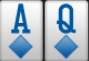

**Opponents Hand:**

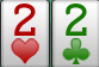

**Community Cards:**

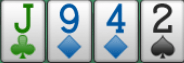

  - **Total Pot** = $60

  - **Opponents Bet** = $20
  
Your opponent has decided to be helpful and show you his cards, and has a set of 2s. *To win the hand on the River, you must hit any Diamond except a Jack or 2.* The Jack or 2 of Diamonds would give your opponent a better hand, a full house and four of a kind respectively. You have to call \\$20 to stay in the hand, and if you win the hand you win \$60. *If your expected value is greater than $20 you should call the bet, and if not you should fold.*

Figure out if you should call the bet:

In [4]:
# Sample Space

# Your opponent provided you information... use it!

# Outcomes

# You can't count the two diamonds that won't help you win

# Determine win probability

# Determine expected value

# Print ev and appropriate decision


Your expected value is less than the $20 you would need to risk to get that reward, so you must fold!